In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [366]:


# Define the dataset path
dataset_path = "/Users/olaoluwatunmise/Diamond-Price-Predictor/SDS-CP023-diamond-price-predictor/submissions-team/Oluwatunmise-Olaoluwa/type-of-the-Diamond.csv"
#"/Users/olaoluwatunmise/.cache/kagglehub/datasets/willianoliveiragibin/type-of-the-diamond/versions/1/your_file.csv"

# Load into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Set Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping
pd.set_option('display.width', 200)  # Set a wide width

# Display first few rows
print(df.head())


    cut color clarity  carat  depth  table  price  x (Premium)  z (Very Good)  y (Good)
0  Fair     E     VS2   0.22   65.1   61.0    337         3.87           2.49      3.78
1  Fair     E     SI2   0.86   55.1   69.0   2757         6.45           3.52      6.33
2  Fair     F     SI2   0.96   66.3   62.0   2759         6.27           4.07      5.95
3  Fair     F     VS2   0.70   64.5   57.0   2762         5.57           3.58      5.53
4  Fair     F     VS2   0.70   65.3   55.0   2762         5.63           3.66      5.58


# Exploratory Data Analysis

In [367]:
# Correct column names (assuming x,y,z are dimensions)

df.rename(columns={
    'x (Premium)': 'x',
    'y (Good)': 'y',
    'z (Very Good)': 'z'
}, inplace=True)


In [368]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
              carat         depth         table         price             x             z             y
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722      5.731157      3.538734      5.734526
std        0.474011      1.432621      2.234491   3989.439738      1.121761      0.705699      1.142135
min        0.200000     43.000000     43.000000    326.000000      0.000000      0.000000      0.000000
25%        0.400000     61.000000     56.000000    950.000000      4.710000      2.910000      4.720000
50%        0.700000     61.800000     57.000000   2401.000000      5.700000      3.530000      5.710000
75%        1.040000     62.500000     59.000000   5324.250000      6.540000      4.040000      6.540000
max        5.010000     79.000000     95.000000  18823.000000     10.740000     31.800000     58.900000


In [369]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      53940 non-null  object 
 1   color    53940 non-null  object 
 2   clarity  53940 non-null  object 
 3   carat    53940 non-null  float64
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   z        53940 non-null  float64
 9   y        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


# Identify Missing or Zero Values

#### Since physical dimensions cannot be zero, 
#### we'll check how many rows have x, y, or z equal to 0.

In [370]:
# Check for missing numbers
print(df.isnull().sum())

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
price      0
x          0
z          0
y          0
dtype: int64


In [371]:
missing_values = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)] 

print(f"Rows with zero values in x, y, or z: {missing_values.shape[0]}")

print(missing_values)

Rows with zero values in x, y, or z: 20
             cut color clarity  carat  depth  table  price     x    z     y
699         Fair     G     VS1   1.14   57.5   67.0   6381  0.00  0.0  0.00
2944        Good     G      I1   1.50   64.0   61.0   4731  7.15  0.0  7.04
4467        Good     G     SI2   2.80   63.8   58.0  18788  8.90  0.0  8.85
6061        Good     F     SI2   0.71   64.1   60.0   2130  0.00  0.0  0.00
6062        Good     F     SI2   0.71   64.1   60.0   2130  0.00  0.0  0.00
10022      Ideal     F     SI2   1.07   61.6   56.0   4954  0.00  0.0  6.62
10818      Ideal     G     VS2   1.15   59.2   56.0   5564  6.88  0.0  6.83
14693      Ideal     G     VS2   1.56   62.2   54.0  12800  0.00  0.0  0.00
28599    Premium     G     SI2   1.00   59.1   59.0   3142  6.55  0.0  6.48
28612    Premium     H      I1   1.01   58.1   59.0   3167  6.66  0.0  6.60
29112    Premium     G     SI2   1.10   63.0   59.0   3696  6.50  0.0  6.47
29302    Premium     F     SI2   1.01   59.2   5

### Handle the Zero Values

### The number of rows with zeros are 20 which is insignificant in a total row of 53940

In [372]:
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]


In [373]:
print(df.describe())

              carat         depth         table         price             x             z             y
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000
mean       0.797698     61.749514     57.456834   3930.993231      5.731627      3.540046      5.734887
std        0.473795      1.432331      2.234064   3987.280446      1.119423      0.702530      1.140126
min        0.200000     43.000000     43.000000    326.000000      3.730000      1.070000      3.680000
25%        0.400000     61.000000     56.000000    949.000000      4.710000      2.910000      4.720000
50%        0.700000     61.800000     57.000000   2401.000000      5.700000      3.530000      5.710000
75%        1.040000     62.500000     59.000000   5323.250000      6.540000      4.040000      6.540000
max        5.010000     79.000000     95.000000  18823.000000     10.740000     31.800000     58.900000


In [374]:
print(df.isna().sum())

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
price      0
x          0
z          0
y          0
dtype: int64


In [375]:
# Identify outliers using IQR method

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Identify outliers for key numerical features
outlier_columns = ['carat', 'price', 'x', 'y', 'z']
outliers = {col: detect_outliers(df, col) for col in outlier_columns}

# Print number of outliers detected
for col, data in outliers.items():
    print(f"Outliers in {col}: {data.shape[0]}")


Outliers in carat: 1883
Outliers in price: 3532
Outliers in x: 24
Outliers in y: 22
Outliers in z: 29


In [376]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for carat, x, y, z
for col in ['carat', 'x', 'y', 'z']:
    df = remove_outliers(df, col)

# Ensure price is within a reasonable range (e.g., 326 to 100,000)
df = df[(df['price'] >= 326) & (df['price'] <= 100000)]

# Recompute price_log
df['price_log'] = np.log1p(df['price'])

# Recompute volume
df['volume'] = df['x'] * df['y'] * df['z']

# Check the new summary statistics
print(df[['carat', 'price', 'x', 'y', 'z', 'volume']].describe())

              carat         price             x             y             z        volume
count  52033.000000  52033.000000  52033.000000  52033.000000  52033.000000  52033.000000
mean       0.748625   3532.266081      5.639868      5.642594      3.483037    121.890890
std        0.402067   3414.610741      1.026844      1.020042      0.634845     64.892300
min        0.200000    326.000000      3.730000      3.680000      1.410000     31.707984
25%        0.390000    928.000000      4.690000      4.700000      2.890000     64.116990
50%        0.700000   2288.000000      5.650000      5.660000      3.490000    113.040954
75%        1.020000   4956.000000      6.480000      6.470000      4.010000    166.460160
max        2.000000  18818.000000      8.420000      8.350000      5.370000    343.869300


# Understanding the Outliers

## We need to understand that the outliers are not errors but rather natural variations

### Carat: Outliers (1,883 rows ≈ 3.5%) could represent unusually large diamonds, which are rare but real.

### Price: Outliers (3,532 rows ≈ 6.5%) could correspond to premium diamonds with exceptional carat, clarity, color, or cut.


#### We Check if these outliers align with domain expectations (e.g., high carat → high price) using scatter plots or correlations.




# Correlation Matrix

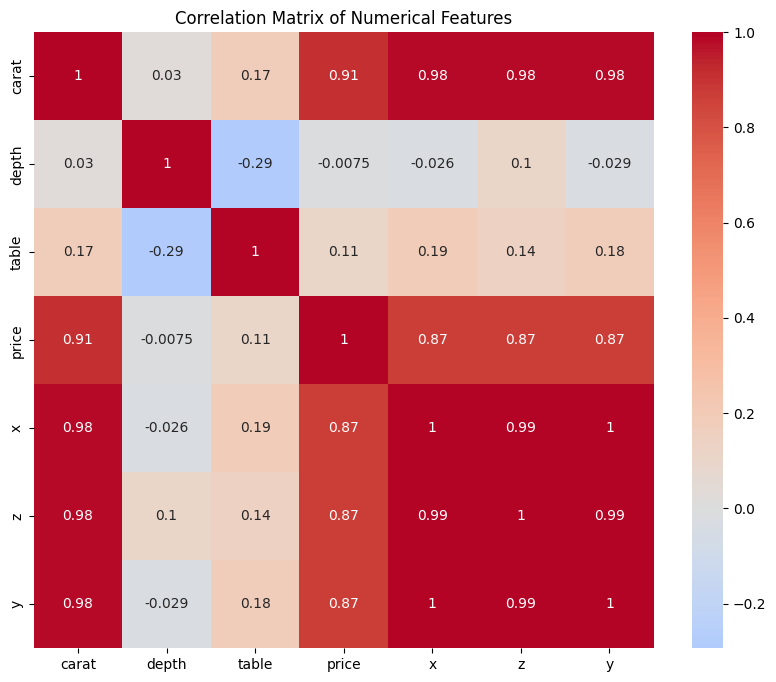

In [377]:
# Correlation matrix
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'z', 'y']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# The Scatter Plot

### The scatter plots "Carat vs Price" and "Carat vs x Dimension"—offer a visual confirmation of the relationships between these features in your diamond dataset. 

#### The Scatter Plot shows that the Outliers are domain-consistent, i would keep them as-is and use a robust model (Random Forest or Gradient Boosting) that can handle non-linear relationships and outliers naturally.



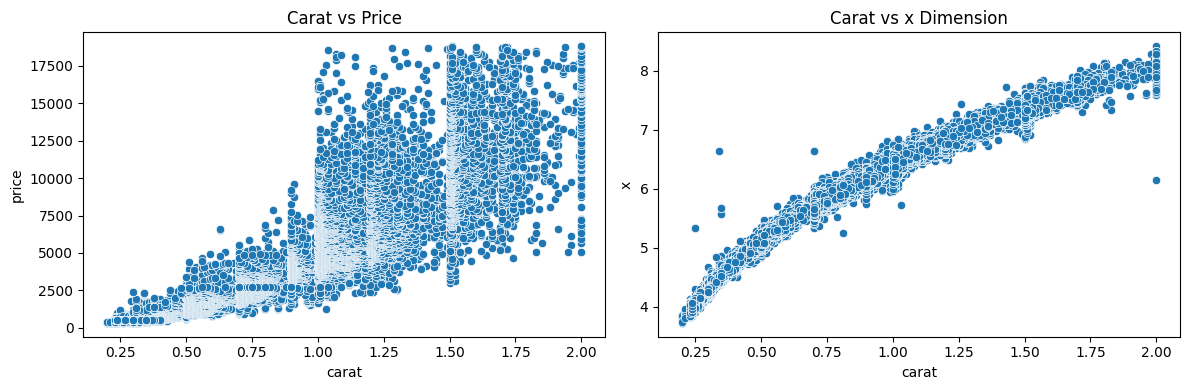

In [378]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='carat', y='price')
plt.title('Carat vs Price')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='carat', y='x')
plt.title('Carat vs x Dimension')
plt.tight_layout()
plt.show()


In [379]:
print(df)
print(df.describe())

             cut color clarity  carat  depth  table  price     x     z     y  price_log      volume
0           Fair     E     VS2   0.22   65.1   61.0    337  3.87  2.49  3.78   5.823046   36.425214
1           Fair     E     SI2   0.86   55.1   69.0   2757  6.45  3.52  6.33   7.922261  143.716320
2           Fair     F     SI2   0.96   66.3   62.0   2759  6.27  4.07  5.95   7.922986  151.837455
3           Fair     F     VS2   0.70   64.5   57.0   2762  5.57  3.58  5.53   7.924072  110.271518
4           Fair     F     VS2   0.70   65.3   55.0   2762  5.63  3.66  5.58   7.924072  114.980364
...          ...   ...     ...    ...    ...    ...    ...   ...   ...   ...        ...         ...
53935  Very Good     E     VS2   0.70   62.8   60.0   2755  5.59  3.53  5.65   7.921536  111.489755
53936  Very Good     D     VS1   0.70   63.1   59.0   2755  5.67  3.55  5.58   7.921536  112.317030
53937  Very Good     E     VS2   0.70   60.5   59.0   2757  5.71  3.47  5.76   7.922261  114.126912


# Categorical Encoding 

In [380]:
df['cut'].value_counts()

cut
Ideal        21073
Premium      13041
Very Good    11692
Good          4735
Fair          1492
Name: count, dtype: int64

In [381]:
df['color'].value_counts()

color
G    11045
E     9717
F     9416
H     7837
D     6730
I     4863
J     2425
Name: count, dtype: int64

In [382]:

df['clarity'].value_counts()

clarity
SI1     12606
VS2     11997
SI2      8218
VS1      8078
VVS2     5060
VVS1     3649
IF       1786
I1        639
Name: count, dtype: int64

In [383]:
unique_values = df['color'].unique().tolist()
unique_values


['E', 'F', 'H', 'G', 'J', 'I', 'D']

### Ordinal Encoding (For Ordered Categories)



#### Each unique row were ranked from Best to Worst to better help our result when we encode them.

In [384]:
df = df.copy() # Create a deep copy to prevent the warning

cut_order = ['ideal', 'Premium', 'Very Good', 'Good', 'Fair']
#cut_order = df['cut'].unique().tolist()
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
#color_order = df['color'].unique().tolist()
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
#Clarity is from best to worst

df['cut_encoded'] = pd.Categorical(df['cut'],categories=cut_order, ordered = True).codes
df['color_encoded'] = pd.Categorical(df['color'], categories=color_order, ordered = True).codes
df['clarity_encoded'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True).codes

df.head()


,cut,color,clarity,carat,depth,table,price,x,z,y,price_log,volume,cut_encoded,color_encoded,clarity_encoded
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78,5.823046,36.425214,4,1,4
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33,7.922261,143.716320,4,1,6
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95,7.922986,151.837455,4,2,6
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53,7.924072,110.271518,4,2,4
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58,7.924072,114.980364,4,2,4


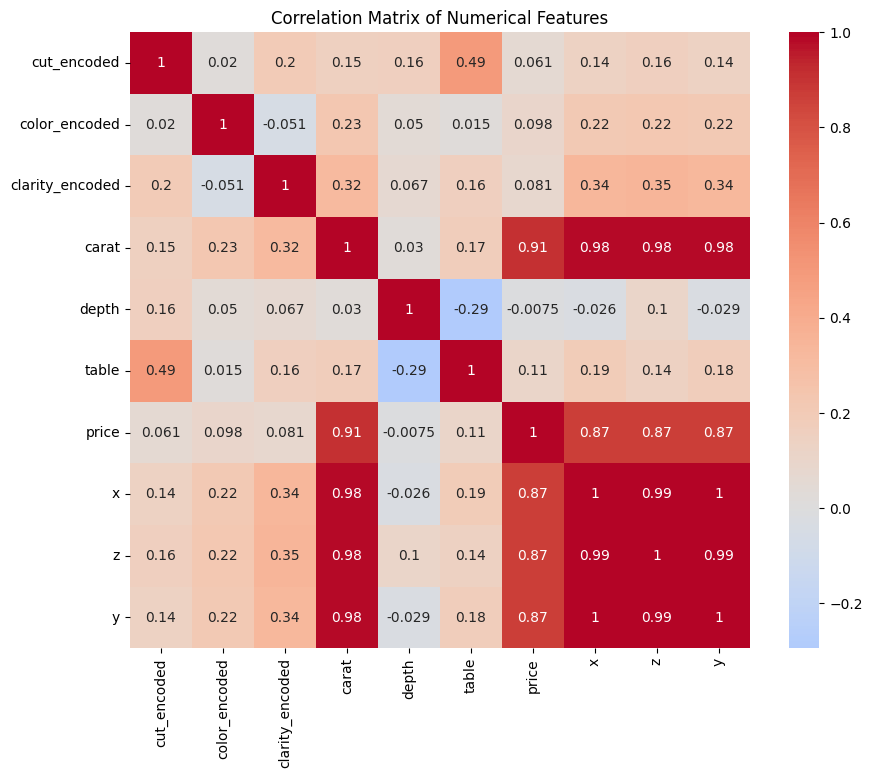

In [385]:
# Correlation matrix
numeric_cols = ['cut_encoded','color_encoded','clarity_encoded','carat', 'depth', 'table', 'price', 'x', 'z', 'y']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

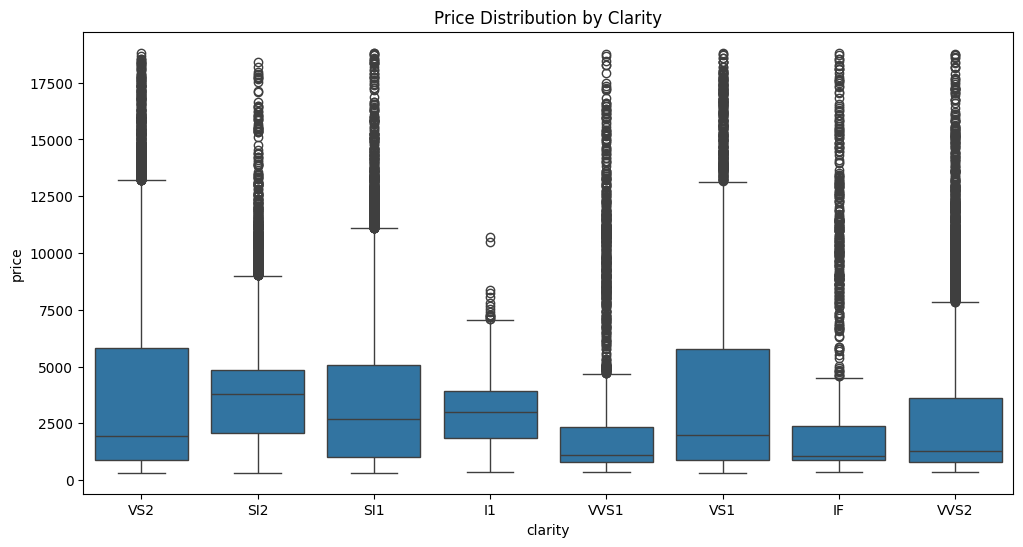

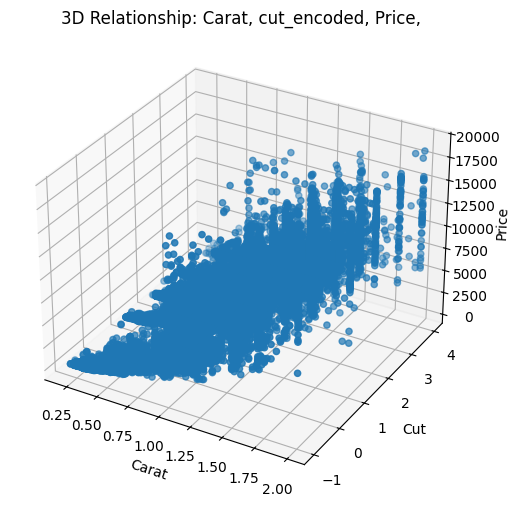

In [386]:
# Price vs Clarity
plt.figure(figsize=(12,6))
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price Distribution by Clarity')
plt.show()

# 3D Scatter Plot (carat, depth, price)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['carat'], df['cut_encoded'], df['price'])
ax.set_xlabel('Carat')
ax.set_ylabel('Cut')
ax.set_zlabel('Price')
plt.title('3D Relationship: Carat, cut_encoded, Price,')
plt.show()

# Feature Engineering

### Interaction Terms

In [387]:
df['carat_color_interaction'] = df['carat'] * df['color_encoded']
df['carat_clarity_interaction'] = df['carat'] * df['clarity_encoded']

### Quality Composite

In [388]:
df['quality_composite'] = (df['cut_encoded']*0.2 + df['color_encoded']*0.4 + df['clarity_encoded']*0.4)

### Dimension - Volume

In [389]:
df['volume'] = (df['x'] * df['y'] * df['z'])

### Log Transformation

In [390]:
df['price_log'] = np.log1p(df['price'])

In [391]:
print(df.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price', 'x', 'z', 'y', 'price_log', 'volume', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'carat_color_interaction',
       'carat_clarity_interaction', 'quality_composite'],
      dtype='object')>


### Feature Selection

In [392]:
model_col = ['price','price_log','carat', 'carat_color_interaction', 'carat_clarity_interaction',
       'quality_composite', 'volume']


In [393]:
model_df = df[model_col]
print(model_df)

       price  price_log  carat  carat_color_interaction  carat_clarity_interaction  quality_composite      volume
0        337   5.823046   0.22                     0.22                       0.88                2.8   36.425214
1       2757   7.922261   0.86                     0.86                       5.16                3.6  143.716320
2       2759   7.922986   0.96                     1.92                       5.76                4.0  151.837455
3       2762   7.924072   0.70                     1.40                       2.80                3.2  110.271518
4       2762   7.924072   0.70                     1.40                       2.80                3.2  114.980364
...      ...        ...    ...                      ...                        ...                ...         ...
53935   2755   7.921536   0.70                     0.70                       2.80                2.4  111.489755
53936   2755   7.921536   0.70                     0.00                       2.10      

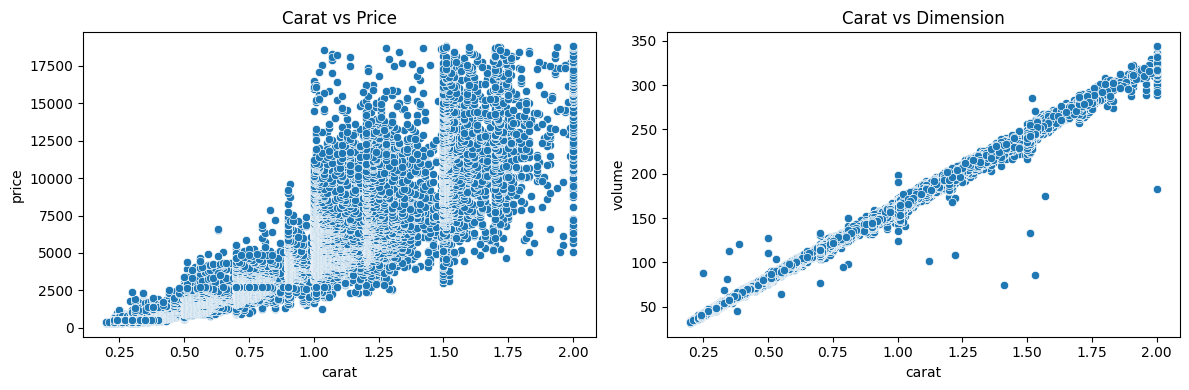

In [394]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=model_df, x='carat', y='price')
plt.title('Carat vs Price')
plt.subplot(1, 2, 2)
sns.scatterplot(data=model_df, x='carat', y='volume')
plt.title('Carat vs Dimension')
plt.tight_layout()
plt.show()

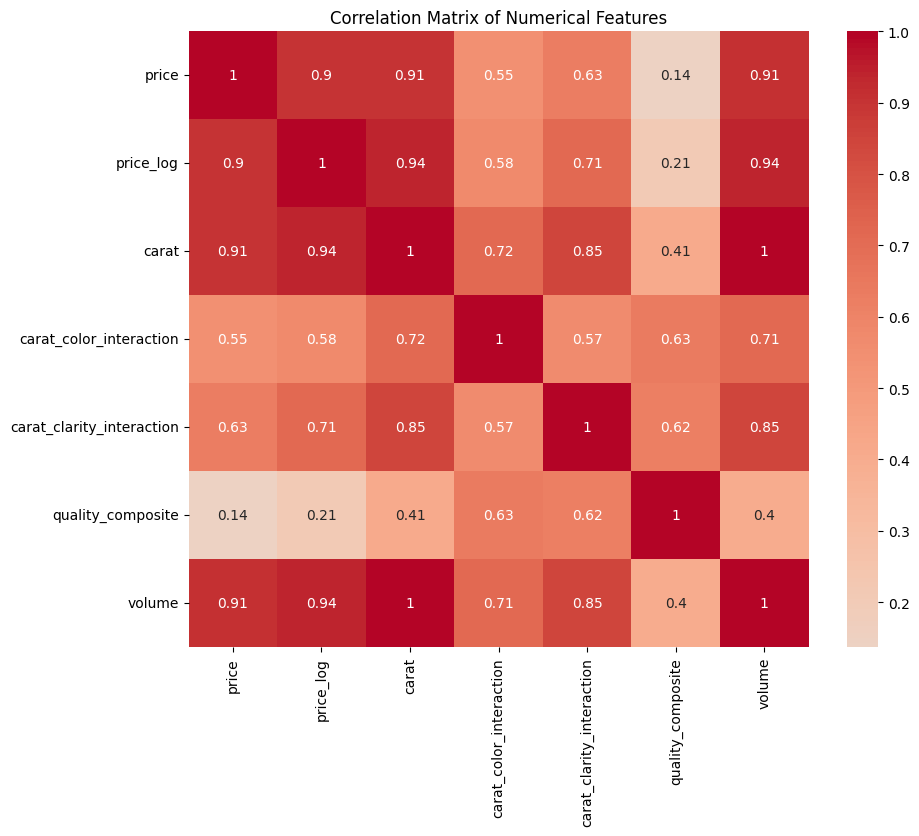

In [395]:
corr_matrix = df[model_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [396]:
print(model_df)

with open("model_df.pkl", "wb") as f:
    pickle.dump(model_df, f)

       price  price_log  carat  carat_color_interaction  carat_clarity_interaction  quality_composite      volume
0        337   5.823046   0.22                     0.22                       0.88                2.8   36.425214
1       2757   7.922261   0.86                     0.86                       5.16                3.6  143.716320
2       2759   7.922986   0.96                     1.92                       5.76                4.0  151.837455
3       2762   7.924072   0.70                     1.40                       2.80                3.2  110.271518
4       2762   7.924072   0.70                     1.40                       2.80                3.2  114.980364
...      ...        ...    ...                      ...                        ...                ...         ...
53935   2755   7.921536   0.70                     0.70                       2.80                2.4  111.489755
53936   2755   7.921536   0.70                     0.00                       2.10      